In [ ]:
!pip install -U langgraph langchain_community langchain_google_genai langchain_experimental

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.4/152.4 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.2/209.2 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: google-ai-generativelanguage
    Found existing installation: google-ai-generativelanguage 0.6.15
    Uninstalli

In [ ]:
!pip install faster-whisper

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.3/35.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 6.7 MB/s eta 0:00:00


In [ ]:
import os
os.kill(os.getpid(), 9)

In [ ]:
!rm -rf /content/faculty_attendance.db

In [ ]:
import sqlite3

# Database setup function (from your provided code)
def setup_database():
    """Create and populate the database with dummy data"""
    conn = sqlite3.connect("faculty_attendance.db")
    cursor = conn.cursor()

    # Create Faculties table
    cursor.execute("""
    CREATE TABLE IF NOT EXISTS faculties (
        faculty_id INTEGER PRIMARY KEY,
        name TEXT NOT NULL,
        email TEXT UNIQUE NOT NULL,
        department TEXT NOT NULL,
        designation TEXT NOT NULL,
        phone_number TEXT,
        status TEXT CHECK(status IN ('Active', 'Inactive')) NOT NULL
    );
    """)

    # Create Attendance table
    cursor.execute("""
    CREATE TABLE IF NOT EXISTS attendance (
        attendance_id INTEGER PRIMARY KEY,
        faculty_id INTEGER NOT NULL,
        date DATE NOT NULL,
        status TEXT CHECK(status IN ('Present', 'Absent')) NOT NULL,
        FOREIGN KEY(faculty_id) REFERENCES faculties(faculty_id)
    );
    """)

    # Also add a faculty with similar name to test ambiguity
    faculties_data = [
        (1, "Alice Sharma", "alice@university.edu", "Computer Science", "Assistant Prof.", "9876543210", "Active"),
        (2, "Bob Verma", "bob@university.edu", "Mathematics", "Associate Prof.", "9123456780", "Active"),
        (3, "Carol Singh", "carol@university.edu", "Physics", "Professor", "9988776655", "Active"),
        (4, "Alice Johnson", "alice.j@university.edu", "Chemistry", "Assistant Prof.", "9876543211", "Active")
    ]

    cursor.executemany("""
    INSERT OR REPLACE INTO faculties (faculty_id, name, email, department, designation, phone_number, status)
    VALUES (?, ?, ?, ?, ?, ?, ?);
    """, faculties_data)

    # Insert more comprehensive dummy data into attendance to demonstrate updates
    attendance_data = [
        (1, 1, '2025-06-13', 'Present'),
        (2, 1, '2025-06-12', 'Absent'),
        (3, 2, '2025-06-11', 'Present'),
        (4, 2, '2025-06-10', 'Present'),
        (5, 3, '2025-06-10', 'Absent'),
        (6, 1, '2025-05-30', 'Present'),  # Last month data
        (7, 2, '2025-05-30', 'Absent'),
        (8, 3, '2025-05-29', 'Present')
    ]

    cursor.executemany("""
    INSERT OR REPLACE INTO attendance (attendance_id, faculty_id, date, status)
    VALUES (?, ?, ?, ?);
    """, attendance_data)

    conn.commit()
    conn.close()
    print("SQLite DB created with dummy data.")

In [ ]:
setup_database()

SQLite DB created with dummy data.


In [ ]:
import getpass
import os
os.environ['GOOGLE_API_KEY'] = getpass.getpass('Enter your Gemini API key: ')

Enter your Gemini API key: ··········


In [ ]:
import sqlite3
from datetime import date, datetime
from typing import TypedDict, Literal, List, Optional
from pydantic import BaseModel, Field
from langchain_google_genai import ChatGoogleGenerativeAI
from langgraph.graph import StateGraph, END
import re

# Initialize LLM
llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash-lite")

# Database utility function
def execute_sql_query(sql_query, db_path="faculty_attendance.db"):
    """
    Executes a given SQL query on the SQLite database.
    """
    try:
        conn = sqlite3.connect(db_path)
        cursor = conn.cursor()

        cursor.execute(sql_query)

        if sql_query.strip().lower().startswith("select"):
            result = cursor.fetchall()
            return result
        else:
            conn.commit()
            return None
    except sqlite3.Error as e:
        print(f"SQLite error: {e}")
        return None
    finally:
        conn.close()

# State definition
class AttendanceState(TypedDict):
    user_input: str
    answerable: bool
    reason: str
    query_type: Literal["update", "search", "irrelevant"]
    missing_fields: List[str]
    faculty_id: Optional[int]
    faculty_name: Optional[str]
    date: Optional[str]
    status: Optional[str]
    sql_query: Optional[str]
    query_result: Optional[List]
    final_answer: str

# Pydantic models for structured outputs
class GuardrailResponse(BaseModel):
    """Response from guardrail node"""
    answerable: bool = Field(..., description="Whether the query is related to attendance system")
    reason: str = Field(..., description="Reason for the decision")
    query_type: Literal["update", "search", "irrelevant"] = Field(..., description="Type of query")

class UpdateQueryResponse(BaseModel):
    """Response from update query node"""
    has_all_info: bool = Field(..., description="Whether all required fields are present")
    missing_fields: List[str] = Field(..., description="List of missing fields")
    faculty_name: Optional[str] = Field(None, description="Extracted faculty name")
    date: Optional[str] = Field(None, description="Extracted date (YYYY-MM-DD format)")
    status: Optional[Literal["Present", "Absent"]] = Field(None, description="Extracted attendance status")
    sql_query_for_id: Optional[str] = Field(None, description="SQL query to find faculty ID")

class SearchQueryResponse(BaseModel):
    """Response from search query node"""
    answerable: bool = Field(..., description="Whether the search query can be answered")
    reason: str = Field(..., description="Reason if not answerable")
    sql_query: Optional[str] = Field(None, description="SQL query to fetch data")

class FeedbackResponse(BaseModel):
    """Response from feedback node"""
    final_answer: str = Field(..., description="User-friendly response")

# Node implementations
def guardrail_node(state: AttendanceState) -> AttendanceState:
    """
    Check if user query is relevant to attendance system and determine query type
    """
    prompt = f"""
    You are a guardrail for an automated faculty attendance system.

    The system has two main functionalities:
    1. Update/Create attendance records for faculty members
    2. Search/Query attendance information

    Database schema:
    - faculties table: faculty_id, name, email, department, designation, phone_number, status
    - attendance table: attendance_id, faculty_id, date, status (Present/Absent)

    Analyze the user input: "{state['user_input']}"

    Determine:
    1. Is this query related to the attendance system? (answerable: true/false)
    2. What type of query is this?
       - "update": User wants to mark attendance, update attendance, record attendance
       - "search": User wants to check attendance, get attendance reports, find attendance info
       - "irrelevant": Query is not related to attendance system
    3. Provide a clear reason for your decision

    Examples:
    - "Mark John as present today" -> answerable: true, query_type: "update"
    - "Is Alice present today?" -> answerable: true, query_type: "search"
    - "What's the weather like?" -> answerable: false, query_type: "irrelevant"
    """

    structured_llm = llm.with_structured_output(GuardrailResponse)
    response = structured_llm.invoke(prompt)

    return {
        **state,
        "answerable": response.answerable,
        "reason": response.reason,
        "query_type": response.query_type
    }

def update_query_node(state: AttendanceState) -> AttendanceState:
    """
    Process attendance update requests
    """
    # Task 1: Extract information using LLM
    prompt = f"""
    You are processing an attendance update request for a faculty attendance system.

    Database schema:
    - faculties table: faculty_id (PRIMARY KEY), name, email, department, designation, phone_number, status
    - attendance table: attendance_id (PRIMARY KEY), faculty_id (FOREIGN KEY), date (DATE), status (Present/Absent)

    User request: "{state['user_input']}"

    Extract the following information:
    1. Faculty name (required)
    2. Date (required) - convert to YYYY-MM-DD format. If "today" is mentioned, use today's date: {date.today()}
    3. Status (required) - must be either "Present" or "Absent"

    If all information is present, also generate a SQL query to find the faculty ID using fuzzy matching:
    SELECT faculty_id, name FROM faculties WHERE name LIKE '%extracted_name%' AND status = 'Active';

    Determine:
    - has_all_info: true if all three fields (name, date, status) are clearly provided
    - missing_fields: list of missing fields
    - If all info present: provide extracted values and SQL query
    """

    structured_llm = llm.with_structured_output(UpdateQueryResponse)
    response = structured_llm.invoke(prompt)

    state.update({
        "missing_fields": response.missing_fields,
        "faculty_name": response.faculty_name,
        "date": response.date,
        "status": response.status
    })

    if not response.has_all_info:
        state["reason"] = f"Missing required information: {', '.join(response.missing_fields)}"
        return state

    # Task 2: Execute SQL operations (no LLM)
    if response.sql_query_for_id:
        # Find faculty ID
        faculty_results = execute_sql_query(response.sql_query_for_id)

        if not faculty_results:
            state["reason"] = f"Faculty '{response.faculty_name}' not found in the database"
            return state
        elif len(faculty_results) > 1:
            names = [result[1] for result in faculty_results]
            state["reason"] = f"Multiple faculty members found: {', '.join(names)}. Please be more specific."
            return state

        faculty_id = faculty_results[0][0]
        state["faculty_id"] = faculty_id

        # Delete existing attendance record for the same date
        delete_query = f"DELETE FROM attendance WHERE faculty_id = {faculty_id} AND date = '{response.date}'"
        execute_sql_query(delete_query)

        # Insert new attendance record
        insert_query = f"INSERT INTO attendance (faculty_id, date, status) VALUES ({faculty_id}, '{response.date}', '{response.status}')"
        execute_sql_query(insert_query)

        state["reason"] = f"Attendance updated successfully for {response.faculty_name} on {response.date}: {response.status}"

    return state

def search_query_node(state: AttendanceState) -> AttendanceState:
    """
    Process attendance search/query requests
    """
    prompt = f"""
    You are processing a search query for a faculty attendance system.

    Database schema:
    - faculties table: faculty_id (PRIMARY KEY), name, email, department, designation, phone_number, status
    - attendance table: attendance_id (PRIMARY KEY), faculty_id (FOREIGN KEY), date (DATE), status (Present/Absent)

    User query: "{state['user_input']}"
    Current date: {date.today()}

    Analyze if this query can be answered with the available data and generate appropriate SQL query.

    Common query patterns:
    - "Is [name] present today?" -> Check attendance for specific faculty today
    - "Show attendance for [name]" -> Show all attendance records for faculty
    - "Who was absent on [date]?" -> Show all absent faculty on specific date
    - "Attendance report for [department]" -> Show attendance by department

    Generate SQL query using JOINs when needed to get faculty names along with attendance data.

    Example SQL:
    SELECT f.name, a.date, a.status
    FROM faculties f
    JOIN attendance a ON f.faculty_id = a.faculty_id
    WHERE f.name LIKE '%name%' AND a.date = 'date'

    If query cannot be answered (unclear, insufficient info), set answerable to false with reason.
    """

    structured_llm = llm.with_structured_output(SearchQueryResponse)
    response = structured_llm.invoke(prompt)

    state.update({
        "answerable": response.answerable,
        "reason": response.reason,
        "sql_query": response.sql_query
    })

    if response.answerable and response.sql_query:
        # Execute the search query
        results = execute_sql_query(response.sql_query)
        state["query_result"] = results

        if not results:
            state["reason"] = "No records found matching your query"

    return state

def feedback_node(state: AttendanceState) -> AttendanceState:
    """
    Generate user-friendly response based on the processing results
    """
    if not state["answerable"]:
        # Handle irrelevant queries
        prompt = f"""
        The user asked: "{state['user_input']}"

        This query is not related to the attendance system.
        Reason: {state['reason']}

        Provide a polite response explaining that you can only help with faculty attendance-related queries.
        Mention what you can help with:
        - Marking attendance (e.g., "Mark John as present today")
        - Checking attendance (e.g., "Is Alice present today?")
        - Attendance reports and queries
        """
    elif state["query_type"] == "update":
        if state.get("missing_fields"):
            # Missing information for update
            prompt = f"""
            The user wants to update attendance but is missing some required information.
            User request: "{state['user_input']}"
            Missing fields: {', '.join(state['missing_fields'])}

            Provide a helpful response asking for the missing information.
            Required fields: Faculty name, Date, Status (Present/Absent)
            """
        elif state.get("faculty_id"):
            # Successful update
            prompt = f"""
            Attendance has been successfully updated.
            Details: {state['reason']}

            Provide a confirmation message to the user.
            """
        else:
            # Error in update (faculty not found, multiple matches, etc.)
            prompt = f"""
            There was an issue with updating attendance.
            Error: {state['reason']}

            Provide a helpful error message and suggest what the user can do.
            """
    else:  # search query
        if state.get("query_result"):
            # Successful search with results
            results = state["query_result"]
            prompt = f"""
            Search query was successful. Results: {results}
            User query: "{state['user_input']}"

            Format the results in a user-friendly way.
            If results contain (name, date, status), present them clearly.
            If results are attendance records, organize them properly.
            """
        else:
            # No results or error
            prompt = f"""
            Search query completed but no results found.
            User query: "{state['user_input']}"
            Reason: {state.get('reason', 'No matching records found')}

            Provide a helpful response explaining the result.
            """

    structured_llm = llm.with_structured_output(FeedbackResponse)
    response = structured_llm.invoke(prompt)

    return {
        **state,
        "final_answer": response.final_answer
    }

# Graph routing logic
def route_after_guardrail(state: AttendanceState) -> str:
    """Route to appropriate node based on guardrail decision"""
    if not state["answerable"]:
        return "feedback"
    elif state["query_type"] == "update":
        return "update_query"
    elif state["query_type"] == "search":
        return "search_query"
    else:
        return "feedback"

def route_after_update(state: AttendanceState) -> str:
    """Always route to feedback after update processing"""
    return "feedback"

def route_after_search(state: AttendanceState) -> str:
    """Always route to feedback after search processing"""
    return "feedback"

# Build the graph
def create_attendance_graph():
    """Create and return the attendance system graph"""
    workflow = StateGraph(AttendanceState)

    # Add nodes
    workflow.add_node("guardrail", guardrail_node)
    workflow.add_node("update_query", update_query_node)
    workflow.add_node("search_query", search_query_node)
    workflow.add_node("feedback", feedback_node)

    # Set entry point
    workflow.set_entry_point("guardrail")

    # Add conditional edges
    workflow.add_conditional_edges(
        "guardrail",
        route_after_guardrail,
        {
            "update_query": "update_query",
            "search_query": "search_query",
            "feedback": "feedback"
        }
    )

    workflow.add_conditional_edges(
        "update_query",
        route_after_update,
        {"feedback": "feedback"}
    )

    workflow.add_conditional_edges(
        "search_query",
        route_after_search,
        {"feedback": "feedback"}
    )

    # End at feedback
    workflow.add_edge("feedback", END)

    return workflow.compile()

# Usage example
def run_attendance_system(user_input: str):
    """Run the attendance system with user input"""
    graph = create_attendance_graph()

    initial_state = {
        "user_input": user_input,
        "answerable": False,
        "reason": "",
        "query_type": "irrelevant",
        "missing_fields": [],
        "faculty_id": None,
        "faculty_name": None,
        "date": None,
        "status": None,
        "sql_query": None,
        "query_result": None,
        "final_answer": ""
    }

    result = graph.invoke(initial_state)
    return result

def run_attendance_agent_with_streaming(user_input: str):
    """Run the attendance system with streaming to show intermediate steps"""
    graph = create_attendance_graph()

    initial_state = {
        "user_input": user_input,
        "answerable": False,
        "reason": "",
        "query_type": "irrelevant",
        "missing_fields": [],
        "faculty_id": None,
        "faculty_name": None,
        "date": None,
        "status": None,
        "sql_query": None,
        "query_result": None,
        "final_answer": ""
    }

    print(f"🤖 Processing query: '{user_input}'")
    print("=" * 50)

    # Stream the execution
    for step in graph.stream(initial_state):
        node_name = list(step.keys())[0]
        node_output = step[node_name]

        print(f"\n📍 Node: {node_name.upper()}")
        print("-" * 30)

        if node_name == "guardrail":
            print(f"✅ Answerable: {node_output.get('answerable', 'N/A')}")
            print(f"🎯 Query Type: {node_output.get('query_type', 'N/A')}")
            print(f"💭 Reason: {node_output.get('reason', 'N/A')}")

        elif node_name == "update_query":
            if node_output.get('missing_fields'):
                print(f"⚠️  Missing Fields: {', '.join(node_output['missing_fields'])}")
            else:
                print(f"👤 Faculty: {node_output.get('faculty_name', 'N/A')}")
                print(f"📅 Date: {node_output.get('date', 'N/A')}")
                print(f"✅ Status: {node_output.get('status', 'N/A')}")
                if node_output.get('faculty_id'):
                    print(f"🆔 Faculty ID Found: {node_output['faculty_id']}")
            print(f"📝 Result: {node_output.get('reason', 'Processing...')}")

        elif node_name == "search_query":
            print(f"🔍 SQL Query: {node_output.get('sql_query', 'N/A')}")
            if node_output.get('query_result'):
                print(f"📊 Results Found: {len(node_output['query_result'])} records")
                # Show first few results for preview
                results = node_output['query_result'][:3]  # Show max 3 results
                for i, result in enumerate(results, 1):
                    print(f"   {i}. {result}")
                if len(node_output['query_result']) > 3:
                    print(f"   ... and {len(node_output['query_result']) - 3} more")
            else:
                print(f"📊 Results: {node_output.get('reason', 'No results')}")

        elif node_name == "feedback":
            print(f"💬 Final Response:")
            print(f"   {node_output.get('final_answer', 'N/A')}")

    print("\n" + "=" * 50)
    print("🏁 Processing Complete!")

    return graph.invoke(initial_state)

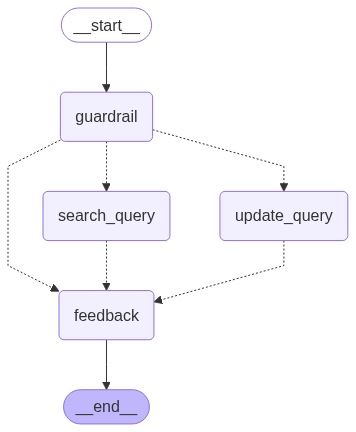

In [ ]:
from IPython.display import Image, display
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles
agent = create_attendance_graph()
display(Image(agent.get_graph().draw_mermaid_png()))

In [ ]:
user_query = "Mark alice sharma as present for today"
print("=" * 50)
result = run_attendance_system(user_query)
print("Final Answer:")
print(result["final_answer"])

Final Answer:
Attendance updated successfully for alice sharma on 2025-06-19: Present


In [ ]:
result

{'user_input': 'Mark alice sharma as present for today',
 'answerable': True,
 'reason': 'Attendance updated successfully for alice sharma on 2025-06-19: Present',
 'query_type': 'update',
 'missing_fields': [],
 'faculty_id': 1,
 'faculty_name': 'alice sharma',
 'date': '2025-06-19',
 'status': 'Present',
 'sql_query': None,
 'query_result': None,
 'final_answer': 'Attendance updated successfully for alice sharma on 2025-06-19: Present'}

In [ ]:
import pandas as pd

db_path = '/content/faculty_attendance.db'
table_name = 'attendance'
conn = sqlite3.connect(db_path)
query = """
SELECT
    a.attendance_id,
    a.faculty_id,
    f.name,
    a.date,
    a.status
FROM
    attendance a
JOIN
    faculties f ON a.faculty_id = f.faculty_id;
"""

df = pd.read_sql_query(query, conn)
conn.close()

df.head(20)

,attendance_id,faculty_id,name,date,status
0,1,1,Alice Sharma,2025-06-13,Present
1,2,1,Alice Sharma,2025-06-12,Absent
2,3,2,Bob Verma,2025-06-11,Present
3,4,2,Bob Verma,2025-06-10,Present
4,5,3,Carol Singh,2025-06-10,Absent
5,6,1,Alice Sharma,2025-05-30,Present
6,7,2,Bob Verma,2025-05-30,Absent
7,8,3,Carol Singh,2025-05-29,Present
8,9,1,Alice Sharma,2025-06-19,Present


In [ ]:
user_query = "Mark sharma as absent for today"
print("=" * 50)
result = run_attendance_agent_with_streaming(user_query)
print("Final Answer:")
print(result["final_answer"])

🤖 Processing query: 'Mark sharma as absent for today'

📍 Node: GUARDRAIL
------------------------------
✅ Answerable: True
🎯 Query Type: update
💭 Reason: The user is asking to mark a faculty member's attendance as absent, which is an update operation in the attendance system.

📍 Node: UPDATE_QUERY
------------------------------
👤 Faculty: sharma
📅 Date: 2025-06-19
✅ Status: Absent
🆔 Faculty ID Found: 1
📝 Result: Attendance updated successfully for sharma on 2025-06-19: Absent

📍 Node: FEEDBACK
------------------------------
💬 Final Response:
   Attendance updated successfully for sharma on 2025-06-19: Absent

🏁 Processing Complete!
Final Answer:
Attendance updated successfully for sharma on 2025-06-19: Absent


In [ ]:
import pandas as pd

db_path = '/content/faculty_attendance.db'
table_name = 'attendance'
conn = sqlite3.connect(db_path)
query = """
SELECT
    a.attendance_id,
    a.faculty_id,
    f.name,
    a.date,
    a.status
FROM
    attendance a
JOIN
    faculties f ON a.faculty_id = f.faculty_id;
"""

df = pd.read_sql_query(query, conn)
conn.close()

df.head(20)

,attendance_id,faculty_id,name,date,status
0,1,1,Alice Sharma,2025-06-13,Present
1,2,1,Alice Sharma,2025-06-12,Absent
2,3,2,Bob Verma,2025-06-11,Present
3,4,2,Bob Verma,2025-06-10,Present
4,5,3,Carol Singh,2025-06-10,Absent
5,6,1,Alice Sharma,2025-05-30,Present
6,7,2,Bob Verma,2025-05-30,Absent
7,8,3,Carol Singh,2025-05-29,Present
8,9,1,Alice Sharma,2025-06-19,Absent


In [ ]:
user_query = "who is prime minister of india"
print("=" * 50)
result = run_attendance_system(user_query)
print("Final Answer:")
print(result["final_answer"])

Final Answer:
I am sorry, I can only assist with queries related to the faculty attendance system. I can help you with tasks such as marking attendance (e.g., "Mark John as present today"), checking attendance (e.g., "Is Alice present today?"), and providing attendance reports and answering attendance-related questions.


In [ ]:
user_query = "can you Sharma attendance for her yesterday absent"
print("=" * 50)
result = run_attendance_system(user_query)
print("Final Answer:")
print(result["final_answer"])

Final Answer:
Attendance updated successfully for Sharma on 2025-06-18: Absent


In [ ]:
import pandas as pd

db_path = '/content/faculty_attendance.db'
table_name = 'attendance'
conn = sqlite3.connect(db_path)
query = """
SELECT
    a.attendance_id,
    a.faculty_id,
    f.name,
    a.date,
    a.status
FROM
    attendance a
JOIN
    faculties f ON a.faculty_id = f.faculty_id;
"""

df = pd.read_sql_query(query, conn)
conn.close()

df.head(20)

,attendance_id,faculty_id,name,date,status
0,1,1,Alice Sharma,2025-06-13,Present
1,2,1,Alice Sharma,2025-06-12,Absent
2,3,2,Bob Verma,2025-06-11,Present
3,4,2,Bob Verma,2025-06-10,Present
4,5,3,Carol Singh,2025-06-10,Absent
5,6,1,Alice Sharma,2025-05-30,Present
6,7,2,Bob Verma,2025-05-30,Absent
7,8,3,Carol Singh,2025-05-29,Present
8,9,1,Alice Sharma,2025-06-19,Absent
9,10,1,Alice Sharma,2025-06-18,Absent


In [ ]:
user_query = "can you shorma attendance for her yesterday absent"
print("=" * 50)
result = run_attendance_system(user_query)
print("Final Answer:")
print(result["final_answer"])

Final Answer:
I am sorry, I couldn't find any attendance records for 'her' who was absent yesterday. There were no results matching your query.


In [ ]:
user_query = "update alice sharma attendance"
print("=" * 50)
result = run_attendance_system(user_query)
print("Final Answer:")
print(result["final_answer"])

Final Answer:
I am missing some information. To update Alice Sharma's attendance, I need the date and status (Present/Absent).


In [ ]:
user_query = "show me attendance report this month department and faculty wise"
print("=" * 50)
result = run_attendance_system(user_query)
print("Final Answer:")
print(result["final_answer"])

Final Answer:
Here's the attendance report for this month, organized by department and faculty:

Computer Science:
  Alice Sharma:
    - June 12, 2025: Absent
    - June 13, 2025: Present
    - June 18, 2025: Absent
    - June 19, 2025: Absent

Mathematics:
  Bob Verma:
    - June 10, 2025: Present
    - June 11, 2025: Present

Physics:
  Carol Singh:
    - June 10, 2025: Absent


In [ ]:
user_query = "update alice and bob attendace today as present"
print("=" * 50)
result = run_attendance_system(user_query)
print("Final Answer:")
print(result["final_answer"])

Final Answer:
Multiple faculty members with the same name were found. Please specify the faculty member by providing additional details such as their employee ID or department to avoid ambiguity.


In [ ]:
user_query = "Show me attendance performance for all faculties for this month"
print("=" * 50)
result = run_attendance_system(user_query)
print("Final Answer:")
print(result["final_answer"])

Final Answer:
Here's the attendance performance for this month:

*   **Alice Sharma:**
    *   June 12, 2025: Absent
    *   June 13, 2025: Present
    *   June 18, 2025: Absent
    *   June 19, 2025: Absent
*   **Bob Verma:**
    *   June 10, 2025: Present
    *   June 11, 2025: Present
*   **Carol Singh:**
    *   June 10, 2025: Absent


In [ ]:
user_query = "Which faculty has highest absent marked for this month"
print("=" * 50)
result = run_attendance_system(user_query)
print("Final Answer:")
print(result["final_answer"])

Final Answer:
Alice Sharma has the highest number of absences this month.


In [ ]:
!wget https://audio-samples.github.io/samples/mp3/blizzard_biased/sample-0.mp3

--2025-06-19 08:41:40--  https://audio-samples.github.io/samples/mp3/blizzard_biased/sample-0.mp3
Resolving audio-samples.github.io (audio-samples.github.io)... 185.199.108.153, 185.199.110.153, 185.199.109.153, ...
Connecting to audio-samples.github.io (audio-samples.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121671 (119K) [audio/mp3]
Saving to: ‘sample-0.mp3’

sample-0.mp3        100%[===================>] 118.82K  --.-KB/s    in 0.02s   

2025-06-19 08:41:40 (6.26 MB/s) - ‘sample-0.mp3’ saved [121671/121671]



In [ ]:
from faster_whisper import WhisperModel

model_size = "small"
model = WhisperModel(model_size, device="cpu", compute_type="int8")
model

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.bin:   0%|          | 0.00/484M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.20M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/2.37k [00:00<?, ?B/s]

vocabulary.txt:   0%|          | 0.00/460k [00:00<?, ?B/s]

In [ ]:
segments, info = model.transcribe("/content/sample-0.mp3")

In [ ]:
from IPython.display import Audio, display

audio_path = "/content/sample-0.mp3"
display(Audio(audio_path, autoplay=False))

In [ ]:
segments = list(segments)

In [ ]:
segments

[Segment(id=1, seek=0, start=0.0, end=5.84, text=' Perhaps he made up to the party afterwards, and took her, and his heart at hand continued.', tokens=[50364, 10517, 415, 1027, 493, 281, 264, 3595, 10543, 11, 293, 1890, 720, 11, 293, 702, 1917, 412, 1011, 7014, 13, 50656], avg_logprob=-0.3132835395634174, compression_ratio=1.25, no_speech_prob=0.004325180780142546, words=None, temperature=0.0),
 Segment(id=2, seek=0, start=5.84, end=9.68, text=' It was not fear eyes set it over her.', tokens=[50656, 467, 390, 406, 4240, 2575, 992, 309, 670, 720, 13, 50848], avg_logprob=-0.3132835395634174, compression_ratio=1.25, no_speech_prob=0.004325180780142546, words=None, temperature=0.0),
 Segment(id=3, seek=0, start=9.68, end=10.68, text=' Edmund', tokens=[50848, 3977, 35578, 50898], avg_logprob=-0.3132835395634174, compression_ratio=1.25, no_speech_prob=0.004325180780142546, words=None, temperature=0.0)]

In [ ]:
transcription = ''
for i in segments:
    transcription += i.text.strip() + ' '

transcription

'Perhaps he made up to the party afterwards, and took her, and his heart at hand continued. It was not fear eyes set it over her. Edmund '

In [ ]:
def get_transciption(audio_path):
    segments, info = model.transcribe(audio_path)
    transcription = ''
    for i in segments:
        transcription += i.text.strip() + ' '
    return transcription

In [ ]:
audio_path = "/content/sample-0.mp3"
transcription = get_transciption(audio_path)
transcription

'Perhaps he made up to the party afterwards, and took her, and his heart at hand continued. It was not fear eyes set it over her. Edmund '

In [ ]:
from faster_whisper import WhisperModel

model_size = "small"
model = WhisperModel(model_size, device="cpu", compute_type="int8")

def get_transciption(audio_path):
    segments, info = model.transcribe(audio_path)
    transcription = ''
    for i in segments:
        transcription += i.text.strip() + ' '
    return transcription

## streamlit ui

In [ ]:
!pip install streamlit pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 68.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 66.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.4 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import streamlit as st
import sqlite3
import pandas as pd
import io
import tempfile
import os
from datetime import date, datetime
from typing import TypedDict, Literal, List, Optional
from pydantic import BaseModel, Field
from langchain_google_genai import ChatGoogleGenerativeAI
from langgraph.graph import StateGraph, END
from faster_whisper import WhisperModel
import time

# Page configuration
st.set_page_config(
    page_title="🎓 Smart Attendance System",
    page_icon="🎓",
    layout="wide",
    initial_sidebar_state="expanded"
)

# Custom CSS for better styling
st.markdown("""
<style>
    .main-header {
        background: linear-gradient(90deg, #667eea 0%, #764ba2 100%);
        padding: 2rem;
        border-radius: 10px;
        text-align: center;
        margin-bottom: 2rem;
        color: white;
    }

    .step-container {
        background: #f8f9fa;
        border-left: 4px solid #667eea;
        padding: 1rem;
        margin: 1rem 0;
        border-radius: 5px;
    }

    .success-message {
        background: #d4edda;
        border: 1px solid #c3e6cb;
        color: #155724;
        padding: 1rem;
        border-radius: 5px;
        margin: 1rem 0;
    }

    .error-message {
        background: #f8d7da;
        border: 1px solid #f5c6cb;
        color: #721c24;
        padding: 1rem;
        border-radius: 5px;
        margin: 1rem 0;
    }

    .info-box {
        background: #e3f2fd;
        border: 1px solid #bbdefb;
        color: #0d47a1;
        padding: 1rem;
        border-radius: 5px;
        margin: 1rem 0;
    }

    .stSelectbox > div > div {
        background-color: #f8f9fa;
    }

    .stTextInput > div > div > input {
        background-color: #f8f9fa;
    }

    .stTextArea > div > div > textarea {
        background-color: #f8f9fa;
    }
</style>
""", unsafe_allow_html=True)

# Initialize session state
if 'messages' not in st.session_state:
    st.session_state.messages = []

if 'transcription' not in st.session_state:
    st.session_state.transcription = ""

# Load models and initialize components
@st.cache_resource
def load_whisper_model():
    """Load and cache the Whisper model"""
    model_size = "small"
    model = WhisperModel(model_size, device="cpu", compute_type="int8")
    return model

@st.cache_resource
def load_llm():
    """Load and cache the LLM"""
    return ChatGoogleGenerativeAI(model="gemini-2.0-flash-lite")

def get_transcription(audio_path):
    """Transcribe audio using Whisper"""
    model = load_whisper_model()
    segments, info = model.transcribe(audio_path)
    transcription = ''
    for i in segments:
        transcription += i.text.strip() + ' '
    return transcription.strip()

# Database utility function
def execute_sql_query(sql_query, db_path="faculty_attendance.db"):
    """Execute SQL query on the database"""
    try:
        conn = sqlite3.connect(db_path)
        cursor = conn.cursor()

        cursor.execute(sql_query)

        if sql_query.strip().lower().startswith("select"):
            result = cursor.fetchall()
            return result
        else:
            conn.commit()
            return None
    except sqlite3.Error as e:
        st.error(f"Database error: {e}")
        return None
    finally:
        conn.close()

# State definition and Pydantic models (same as before)
class AttendanceState(TypedDict):
    user_input: str
    answerable: bool
    reason: str
    query_type: Literal["update", "search", "irrelevant"]
    missing_fields: List[str]
    faculty_id: Optional[int]
    faculty_name: Optional[str]
    date: Optional[str]
    status: Optional[str]
    sql_query: Optional[str]
    query_result: Optional[List]
    final_answer: str

class GuardrailResponse(BaseModel):
    answerable: bool = Field(..., description="Whether the query is related to attendance system")
    reason: str = Field(..., description="Reason for the decision")
    query_type: Literal["update", "search", "irrelevant"] = Field(..., description="Type of query")

class UpdateQueryResponse(BaseModel):
    has_all_info: bool = Field(..., description="Whether all required fields are present")
    missing_fields: List[str] = Field(..., description="List of missing fields")
    faculty_name: Optional[str] = Field(None, description="Extracted faculty name")
    date: Optional[str] = Field(None, description="Extracted date (YYYY-MM-DD format)")
    status: Optional[Literal["Present", "Absent"]] = Field(None, description="Extracted attendance status")
    sql_query_for_id: Optional[str] = Field(None, description="SQL query to find faculty ID")

class SearchQueryResponse(BaseModel):
    answerable: bool = Field(..., description="Whether the search query can be answered")
    reason: str = Field(..., description="Reason if not answerable")
    sql_query: Optional[str] = Field(None, description="SQL query to fetch data")

class FeedbackResponse(BaseModel):
    final_answer: str = Field(..., description="User-friendly response")

# Node implementations (same as before, but with Streamlit integration)
def guardrail_node(state: AttendanceState) -> AttendanceState:
    llm = load_llm()
    prompt = f"""
    You are a guardrail for an automated faculty attendance system.

    The system has two main functionalities:
    1. Update/Create attendance records for faculty members
    2. Search/Query attendance information

    Database schema:
    - faculties table: faculty_id, name, email, department, designation, phone_number, status
    - attendance table: attendance_id, faculty_id, date, status (Present/Absent)

    Analyze the user input: "{state['user_input']}"

    Determine:
    1. Is this query related to the attendance system? (answerable: true/false)
    2. What type of query is this?
       - "update": User wants to mark attendance, update attendance, record attendance
       - "search": User wants to check attendance, get attendance reports, find attendance info
       - "irrelevant": Query is not related to attendance system
    3. Provide a clear reason for your decision
    """

    structured_llm = llm.with_structured_output(GuardrailResponse)
    response = structured_llm.invoke(prompt)

    return {
        **state,
        "answerable": response.answerable,
        "reason": response.reason,
        "query_type": response.query_type
    }

def update_query_node(state: AttendanceState) -> AttendanceState:
    llm = load_llm()
    prompt = f"""
    You are processing an attendance update request for a faculty attendance system.

    Database schema:
    - faculties table: faculty_id (PRIMARY KEY), name, email, department, designation, phone_number, status
    - attendance table: attendance_id (PRIMARY KEY), faculty_id (FOREIGN KEY), date (DATE), status (Present/Absent)

    User request: "{state['user_input']}"

    Extract the following information:
    1. Faculty name (required)
    2. Date (required) - convert to YYYY-MM-DD format. If "today" is mentioned, use today's date: {date.today()}
    3. Status (required) - must be either "Present" or "Absent"

    If all information is present, also generate a SQL query to find the faculty ID using fuzzy matching:
    SELECT faculty_id, name FROM faculties WHERE name LIKE '%extracted_name%' AND status = 'Active';
    """

    structured_llm = llm.with_structured_output(UpdateQueryResponse)
    response = structured_llm.invoke(prompt)

    state.update({
        "missing_fields": response.missing_fields,
        "faculty_name": response.faculty_name,
        "date": response.date,
        "status": response.status
    })

    if not response.has_all_info:
        state["reason"] = f"Missing required information: {', '.join(response.missing_fields)}"
        return state

    if response.sql_query_for_id:
        faculty_results = execute_sql_query(response.sql_query_for_id)

        if not faculty_results:
            state["reason"] = f"Faculty '{response.faculty_name}' not found in the database"
            return state
        elif len(faculty_results) > 1:
            names = [result[1] for result in faculty_results]
            state["reason"] = f"Multiple faculty members found: {', '.join(names)}. Please be more specific."
            return state

        faculty_id = faculty_results[0][0]
        state["faculty_id"] = faculty_id

        delete_query = f"DELETE FROM attendance WHERE faculty_id = {faculty_id} AND date = '{response.date}'"
        execute_sql_query(delete_query)

        insert_query = f"INSERT INTO attendance (faculty_id, date, status) VALUES ({faculty_id}, '{response.date}', '{response.status}')"
        execute_sql_query(insert_query)

        state["reason"] = f"Attendance updated successfully for {response.faculty_name} on {response.date}: {response.status}"

    return state

def search_query_node(state: AttendanceState) -> AttendanceState:
    llm = load_llm()
    prompt = f"""
    You are processing a search query for a faculty attendance system.

    Database schema:
    - faculties table: faculty_id (PRIMARY KEY), name, email, department, designation, phone_number, status
    - attendance table: attendance_id (PRIMARY KEY), faculty_id (FOREIGN KEY), date (DATE), status (Present/Absent)

    User query: "{state['user_input']}"
    Current date: {date.today()}

    Generate appropriate SQL query using JOINs when needed to get faculty names along with attendance data.
    """

    structured_llm = llm.with_structured_output(SearchQueryResponse)
    response = structured_llm.invoke(prompt)

    state.update({
        "answerable": response.answerable,
        "reason": response.reason,
        "sql_query": response.sql_query
    })

    if response.answerable and response.sql_query:
        results = execute_sql_query(response.sql_query)
        state["query_result"] = results

        if not results:
            state["reason"] = "No records found matching your query"

    return state

def feedback_node(state: AttendanceState) -> AttendanceState:
    llm = load_llm()

    if not state["answerable"]:
        prompt = f"""
        The user asked: "{state['user_input']}"
        This query is not related to the attendance system.
        Reason: {state['reason']}

        Provide a polite response explaining that you can only help with faculty attendance-related queries.
        """
    elif state["query_type"] == "update":
        if state.get("missing_fields"):
            prompt = f"""
            The user wants to update attendance but is missing some required information.
            User request: "{state['user_input']}"
            Missing fields: {', '.join(state['missing_fields'])}

            Provide a helpful response asking for the missing information.
            """
        else:
            prompt = f"""
            Attendance update result: {state['reason']}
            Provide a confirmation or error message to the user.
            """
    else:
        if state.get("query_result"):
            results = state["query_result"]
            prompt = f"""
            Search query was successful. Results: {results}
            User query: "{state['user_input']}"
            Format the results in a user-friendly way.
            """
        else:
            prompt = f"""
            Search query completed but no results found.
            User query: "{state['user_input']}"
            Reason: {state.get('reason', 'No matching records found')}
            """

    structured_llm = llm.with_structured_output(FeedbackResponse)
    response = structured_llm.invoke(prompt)

    return {
        **state,
        "final_answer": response.final_answer
    }

# Graph creation and routing (same as before)
def route_after_guardrail(state: AttendanceState) -> str:
    if not state["answerable"]:
        return "feedback"
    elif state["query_type"] == "update":
        return "update_query"
    elif state["query_type"] == "search":
        return "search_query"
    else:
        return "feedback"

def create_attendance_graph():
    workflow = StateGraph(AttendanceState)

    workflow.add_node("guardrail", guardrail_node)
    workflow.add_node("update_query", update_query_node)
    workflow.add_node("search_query", search_query_node)
    workflow.add_node("feedback", feedback_node)

    workflow.set_entry_point("guardrail")

    workflow.add_conditional_edges(
        "guardrail",
        route_after_guardrail,
        {
            "update_query": "update_query",
            "search_query": "search_query",
            "feedback": "feedback"
        }
    )

    workflow.add_edge("update_query", "feedback")
    workflow.add_edge("search_query", "feedback")
    workflow.add_edge("feedback", END)

    return workflow.compile()

def display_streaming_output(user_input: str):
    """Display streaming output with Streamlit components"""
    graph = create_attendance_graph()

    initial_state = {
        "user_input": user_input,
        "answerable": False,
        "reason": "",
        "query_type": "irrelevant",
        "missing_fields": [],
        "faculty_id": None,
        "faculty_name": None,
        "date": None,
        "status": None,
        "sql_query": None,
        "query_result": None,
        "final_answer": ""
    }

    st.markdown(f"**🤖 Processing query:** `{user_input}`")

    progress_bar = st.progress(0)
    status_text = st.empty()

    step_count = 0
    total_steps = 3  # Approximate number of steps

    # Create containers for each step
    steps_container = st.container()

    with steps_container:
        for step in graph.stream(initial_state):
            node_name = list(step.keys())[0]
            node_output = step[node_name]
            step_count += 1

            progress_bar.progress(min(step_count / total_steps, 1.0))
            status_text.text(f"Processing: {node_name.title()}")

            with st.expander(f"📍 {node_name.upper()} - Step {step_count}", expanded=True):
                if node_name == "guardrail":
                    col1, col2, col3 = st.columns(3)
                    with col1:
                        if node_output.get('answerable'):
                            st.success(f"✅ Answerable: {node_output['answerable']}")
                        else:
                            st.error(f"❌ Answerable: {node_output['answerable']}")
                    with col2:
                        st.info(f"🎯 Query Type: {node_output.get('query_type', 'N/A')}")
                    with col3:
                        st.write(f"💭 **Reason:** {node_output.get('reason', 'N/A')}")

                elif node_name == "update_query":
                    if node_output.get('missing_fields'):
                        st.warning(f"⚠️ **Missing Fields:** {', '.join(node_output['missing_fields'])}")
                    else:
                        col1, col2, col3 = st.columns(3)
                        with col1:
                            st.write(f"👤 **Faculty:** {node_output.get('faculty_name', 'N/A')}")
                        with col2:
                            st.write(f"📅 **Date:** {node_output.get('date', 'N/A')}")
                        with col3:
                            st.write(f"✅ **Status:** {node_output.get('status', 'N/A')}")

                        if node_output.get('faculty_id'):
                            st.success(f"🆔 **Faculty ID Found:** {node_output['faculty_id']}")

                    st.markdown(f"**📝 Result:** {node_output.get('reason', 'Processing...')}")

                elif node_name == "search_query":
                    if node_output.get('sql_query'):
                        st.code(node_output['sql_query'], language='sql')

                    if node_output.get('query_result'):
                        st.success(f"📊 **Results Found:** {len(node_output['query_result'])} records")
                        # Display results in a nice format
                        if node_output['query_result']:
                            df_results = pd.DataFrame(node_output['query_result'])
                            st.dataframe(df_results, use_container_width=True)
                    else:
                        st.info(f"📊 **Results:** {node_output.get('reason', 'No results')}")

                elif node_name == "feedback":
                    st.markdown("### 💬 Final Response:")
                    st.markdown(f"**{node_output.get('final_answer', 'N/A')}**")

            time.sleep(0.5)  # Small delay for better UX

    progress_bar.progress(1.0)
    status_text.text("✅ Processing Complete!")

    return graph.invoke(initial_state)["final_answer"]

def load_data():
    """Load attendance data with faculty information"""
    db_path = "faculty_attendance.db"
    query = """
    SELECT
        a.attendance_id,
        a.faculty_id,
        f.name,
        f.department,
        f.designation,
        a.date,
        a.status
    FROM
        attendance a
    JOIN
        faculties f ON a.faculty_id = f.faculty_id
    ORDER BY a.date DESC, f.name;
    """

    try:
        conn = sqlite3.connect(db_path)
        df = pd.read_sql_query(query, conn)
        conn.close()
        return df
    except Exception as e:
        st.error(f"Error loading data: {e}")
        return pd.DataFrame()

def main():
    # Header
    st.markdown("""
    <div class="main-header">
        <h1>🎓 AI-Based Smart Attendance System</h1>
        <p>Intelligent Faculty Attendance Management with Natural Language Processing</p>
    </div>
    """, unsafe_allow_html=True)

    # Sidebar
    st.sidebar.title("🎛️ Navigation")

    # Radio button for main options
    option = st.sidebar.radio(
        "Choose an option:",
        ["Ask Query", "Check Data"],
        index=0
    )

    # Add some info in sidebar
    st.sidebar.markdown("---")
    st.sidebar.markdown("### ℹ️ About")
    st.sidebar.markdown("""
    This system allows you to:
    - 🗣️ Ask questions in natural language
    - 🎤 Use voice input for queries
    - 📊 Check attendance data
    - 🤖 Get AI-powered responses
    """)

    if option == "Ask Query":
        st.markdown("## 💬 Ask Your Query")

        # Input method selection
        input_method = st.radio(
            "Choose input method:",
            ["📝 Text Input", "🎤 Audio Input"],
            horizontal=True
        )

        if input_method == "📝 Text Input":
            user_query = st.text_area(
                "Enter your query:",
                placeholder="e.g., 'Mark Alice as present today' or 'Is Bob present today?'",
                height=100
            )

            if st.button("🚀 Process Query", type="primary"):
                if user_query:
                    with st.spinner("Processing your query..."):
                        final_answer = display_streaming_output(user_query)

                    st.markdown("---")
                    st.markdown("### 🎯 Final Answer")
                    st.success(final_answer)
                else:
                    st.warning("Please enter a query first!")

        else:  # Audio Input
            st.markdown("### 🎤 Audio Input")

            # Audio recorder
            audio_file = st.file_uploader(
                "Upload an audio file:",
                type=['wav', 'mp3', 'ogg', 'm4a'],
                help="Upload an audio file to transcribe"
            )

            if audio_file is not None:
                # Save uploaded file temporarily
                with tempfile.NamedTemporaryFile(delete=False, suffix='.wav') as tmp_file:
                    tmp_file.write(audio_file.read())
                    tmp_file_path = tmp_file.name

                # Transcribe audio
                with st.spinner("Transcribing audio..."):
                    try:
                        transcription = get_transcription(tmp_file_path)
                        st.session_state.transcription = transcription
                    except Exception as e:
                        st.error(f"Error transcribing audio: {e}")
                        transcription = ""

                # Clean up temporary file
                os.unlink(tmp_file_path)

                if transcription:
                    st.success("Audio transcribed successfully!")

                    # Allow editing of transcription
                    edited_query = st.text_area(
                        "Edit transcription if needed:",
                        value=transcription,
                        height=100
                    )

                    if st.button("🚀 Process Audio Query", type="primary"):
                        if edited_query:
                            with st.spinner("Processing your query..."):
                                final_answer = display_streaming_output(edited_query)

                            st.markdown("---")
                            st.markdown("### 🎯 Final Answer")
                            st.success(final_answer)
                        else:
                            st.warning("Please provide a query!")

    else:  # Check Data
        st.markdown("## 📊 Attendance Data")

        # Load and display data
        with st.spinner("Loading attendance data..."):
            df = load_data()

        if not df.empty:
            # Display summary statistics
            col1, col2, col3, col4 = st.columns(4)

            with col1:
                st.metric("📋 Total Records", len(df))

            with col2:
                present_count = len(df[df['status'] == 'Present'])
                st.metric("✅ Present", present_count)

            with col3:
                absent_count = len(df[df['status'] == 'Absent'])
                st.metric("❌ Absent", absent_count)

            with col4:
                unique_faculty = df['name'].nunique()
                st.metric("👥 Faculty Members", unique_faculty)

            st.markdown("---")

            # Filters
            st.markdown("### 🔍 Filters")
            col1, col2, col3 = st.columns(3)

            with col1:
                faculty_filter = st.multiselect(
                    "Select Faculty:",
                    options=df['name'].unique(),
                    default=[]
                )

            with col2:
                status_filter = st.multiselect(
                    "Select Status:",
                    options=df['status'].unique(),
                    default=df['status'].unique()
                )

            with col3:
                department_filter = st.multiselect(
                    "Select Department:",
                    options=df['department'].unique(),
                    default=[]
                )

            # Apply filters
            filtered_df = df.copy()

            if faculty_filter:
                filtered_df = filtered_df[filtered_df['name'].isin(faculty_filter)]

            if status_filter:
                filtered_df = filtered_df[filtered_df['status'].isin(status_filter)]

            if department_filter:
                filtered_df = filtered_df[filtered_df['department'].isin(department_filter)]

            # Display filtered data
            st.markdown("### 📋 Attendance Records")
            st.dataframe(
                filtered_df,
                use_container_width=True,
                hide_index=True
            )

            # Download option
            csv = filtered_df.to_csv(index=False)
            st.download_button(
                label="📥 Download CSV",
                data=csv,
                file_name=f"attendance_data_{datetime.now().strftime('%Y%m%d_%H%M%S')}.csv",
                mime="text/csv"
            )

        else:
            st.warning("No attendance data found. Please check your database connection.")

if __name__ == "__main__":
    main()

Writing app.py


In [ ]:
#https://ngrok.com/

In [ ]:
from pyngrok import ngrok

ngrok_key = "2yigBhbdEMmIuemluMVbAzJu53o_6HytrAXdVfnsZa8gmuvjW"
port = 8501

ngrok.set_auth_token(ngrok_key)
ngrok.connect(port).public_url

'https://452e-34-125-111-69.ngrok-free.app'

In [ ]:
!rm -rf logs.txt && streamlit run app.py &>/content/logs.txt

In [ ]:
#Online audio recorder: https://online-voice-recorder.com/